<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#!pip install pandas-profiling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sbn

warnings.simplefilter('ignore')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#Приведем название столбца cityCenters_nearest к нижнему регистру
data = data.rename(columns={'cityCenters_nearest' : 'citycenters_nearest'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
citycenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Некоторые столбцы имеют пропуски. Проверим это методом .isna().
Столбец is_apartment имеет тип данных object, хотя должен иметь bool. Исправим это ниже.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Следущие столбцы имеют пропущеные значения:
ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000 , parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 
В столбце floors_total считаю нужным удалить, тк нет подходящих данных на замену, и объем пропусков составояет менее 0.1%.
В столбце is_apartment много пропущеных значений и означают они, скорее всего, что это не аппартаменты, поэтому заполним пропуски, а также поменяем тип данных на bool.
В столбце balcony пропущеные значения могут означать отсутствие балкона, поэтому заполним пропуски ниже.
В столбце locality_name обнаружено 49 пропущеных значений, тк локация является определяющим фактором при ценообразовании, считаю необходимым удалить пропущенные данные, учитывая, что они составляют менее 0.1% от всех объявлений.

Остальные столбцы необходимо просмотреть более детально, чтобы определить как поступить с пропущенными значениями. 

In [6]:
data.duplicated().sum()

0

Дубликаты в таблице на обнаружены.

In [7]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В столбце ceiling_height обнаружены не корректные данные, у некоторых квартир высота потолков более 5 метров и менее 2.4 метра, что не представляется возможным в многоэтажном доме. Необходимо заменить эти данные на средние значения. Пропуски также необходимо заменить средними значениями.

In [8]:
data['locality_name'].value_counts()

Санкт-Петербург                          15721
посёлок Мурино                             522
посёлок Шушары                             440
Всеволожск                                 398
Пушкин                                     369
                                         ...  
деревня Малая Романовка                      1
деревня Вахнова Кара                         1
село Никольское                              1
поселок городского типа Большая Ижора        1
поселок Пансионат Зелёный Бор                1
Name: locality_name, Length: 364, dtype: int64

Основная часть квартир продается в Санкт-Петербурге (66%). Значит, что Петербург будет иметь сильное воиянение на весь датасет

In [9]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Выявлено очень много типов населенных пунктов, которые вносят больше путаницы, чем пользы, также есть вероятность, что наименования могут повторяться. Необходимо их удалить

In [10]:
data.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


В столбце  last_price картина соответствует действительности, сверху недорогие квартиры небольшой площади и с локацией за пределами Петербурга. Снизу - дорогие, имеющие большую площадь и локацию в центральном округе Петербурга. Выделяется только самая первая квартира в списке, стоимость в 35 раз ниже, чем самые дешевые квартиры, однако площадь и локация говорят об обратном. Возможно сумма указана в отличной от рублей валюте. Тк данная ошибка еденичная, удалим данную строку, чтобы в дальнейшем она не влияла расчет средней цены

### Вывод

Необходимо поработь над несколькими столбцами в части изменения типа данных, а также пропущенных и некорректных значений

## Предобработка данных

In [11]:
#Заполним пропущеные значения в столбце is_apartment нулевыми данными, а также заменим тип данных на bool:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = 0
data['is_apartment'] = data['is_apartment'].astype('bool')

In [12]:
#Заменим пропущеные значения в столбце balcony:
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [13]:
#Заменим некорректные значения в столбце 'ceiling_height', где высота потолков менее 2.4 метра и более 5 на медианные значения, а также заполним пропуски

#data.loc[
#    (data['ceiling_height'] > 5) & 
#    (data['ceiling_height'] < 2.4) &
#    (data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()

# почему-то не сработал код с использованием &, сделаем отдельными строками

data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
#Удалим строки с пропущеными значениями в столбце locality_name, тк они составляют менее 0.1%, а локация может иметь сильное влияюние на ценообразование:
data.dropna(subset=['locality_name'], inplace = True)

In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
#Удалим из locality_name типы населенных пунктов с помощью метода str.replace:
for name in ['городской поселок', 
             'городской посёлок', 
             'деревня', 
             'коттеджный поселок', 
             'поселок', 
             'городского типа', 
             'посёлок', 
             'посёлок городского типа', 
             'село', 
             'садовое товарищество', 
             'при железнодорожной станции', 
             'садоводческое некоммерческое товарищество',
             'коттеджный', 
             'станции', 
             '  ']:
         data['locality_name'] = data['locality_name'].str.replace(name,'')
data['locality_name'].sort_values().unique()

array([' Агалатово', ' Александровская', ' Алексеевка', ' Аннино', ' Аро',
       ' Барышево', ' Батово', ' Бегуницы', ' Белогорка', ' Белоостров',
       ' Большая Вруда', ' Большая Ижора', ' Большая Пустомержа',
       ' Большие Колпаны', ' Большое Рейзино', ' Большой Сабск', ' Бор',
       ' Борисова Грива', ' Бугры', ' Будогощь', ' Ваганово',
       ' Вартемяги', ' Вахнова Кара', ' Виллози', ' Возрождение',
       ' Войсковицы', ' Войскорово', ' Володарское', ' Выскатка',
       ' Высокоключевой', ' Гаврилово', ' Гарболово', ' Гладкое',
       ' Глажево', ' Глебычево', ' Глинка', ' Гончарово', ' Горбунки',
       ' Гостилицы', ' Громово', ' Дзержинского', ' Дружноселье',
       ' Елизаветино', ' Жил', ' Жилгородок', ' Житково', ' Заводской',
       ' Заклинье', ' Заневка', ' Запорожское', ' Зимитицы', ' Извара',
       ' Ильичёво', ' Иссад', ' Калитино', ' Каложицы', ' Кальтино',
       ' Камышовка', ' Каськово', ' Келози', ' Кивеннапа Север',
       ' Кикерино', ' Кингисеппский', 

In [17]:
#Удалим строку с выбивающимся значением в части стоимости:
data.drop(labels =[8793], axis = 0, inplace = True)
data['last_price'].sort_values()

17456       430000.0
14911       430000.0
16274       440000.0
9581        450000.0
16219       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23649, dtype: float64

In [18]:
#Удалим строки с пропущеными значениями в floors_total, тк данных для заполнения у нас нет, и объем пропусков составляет менее 0.1%
data.dropna(subset=['floors_total'], inplace = True)

In [19]:
#Заполним данные в столбцах living_area и kitchen_area. Такие данные мы можем взять исходя из общей площади квартиры. 
#Посчитаем какой средний % составляет жилая площадь и площадь кухни от общей площади квартиры.
#Заполним пропуски в соответствии с этими процентами
part_living = data['living_area'] / data['total_area']
part_kitchen = data['kitchen_area'] / data['total_area']
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * part_living.median()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] * part_kitchen.median()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
citycenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14528
days_exposition          3171
dtype: int64

In [20]:
#Пропуски в столбце days_exposition заполним медианными значениями
data['days_exposition'].sort_values()
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
citycenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14528
days_exposition             0
dtype: int64

In [21]:
#Заполним пропуски в столбце cityсenters_nearest медианными значениями с помощью группировки по столбцу rooms
for name in data['rooms'].unique():
    median = data.loc[data ['rooms'] == name, 'citycenters_nearest'].median()
    data.loc[(data['citycenters_nearest'].isna()) & 
             (data['rooms'] == name), 'citycenters_nearest'] = median 
    
data_pivot = data.pivot_table(index='locality_name', values='citycenters_nearest', aggfunc='median')
data_pivot.sort_values(by='citycenters_nearest')

,citycenters_nearest
locality_name,
Хязельки,4767.5
Дзержинского,8460.0
Возрождение,8460.0
Нижняя,8460.0
Бор,9498.0
...,...
Репино,42896.5
Кронштадт,49572.5
Ломоносов,51677.0


In [22]:
#Аналогичным способом заполним пропуски в столбце airports_nearest
for name in data['rooms'].unique():
    median = data.loc[data ['rooms'] == name, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & 
             (data['rooms'] == name), 'airports_nearest'] = median 
    
data_pivot = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc='median')
data_pivot.sort_values(by='airports_nearest')

,airports_nearest
locality_name,
Александровская,12896.5
Пушкин,15766.0
Шушары,17450.0
Павловск,20529.5
Петро-Славянка,20605.0
...,...
Белоостров,57769.0
Репино,61797.5
Кронштадт,67847.0


In [23]:
#Аналогичным способом заполним пропуски в столбце parks_around3000
for name in data['rooms'].unique():
    median = data.loc[data ['rooms'] == name, 'parks_around3000'].median()
    data.loc[(data['parks_around3000'].isna()) & 
             (data['rooms'] == name), 'parks_around3000'] = median 
    
data_pivot = data.pivot_table(index='locality_name', values='parks_around3000', aggfunc='median')
data_pivot.sort_values(by='parks_around3000')

,parks_around3000
locality_name,
Агалатово,0.0
Торковичи,0.0
Тойворово,0.0
Тихковицы,0.0
Терпилицы,0.0
...,...
Хязельки,1.0
Пушкин,1.0
Кронштадт,2.0


In [24]:
#Аналогичным способом заполним пропуски в столбце parks_nearest
for name in data['rooms'].unique():
    median = data.loc[data ['rooms'] == name, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) & 
             (data['rooms'] == name), 'parks_nearest'] = median 
    
data_pivot = data.pivot_table(index='locality_name', values='parks_nearest', aggfunc='median')
data_pivot.sort_values(by='parks_nearest')

,parks_nearest
locality_name,
Зеленогорск,300.5
Кронштадт,348.0
Хязельки,393.5
Бор,423.0
Нижняя,439.0
...,...
Серебрянский,459.0
Лампово,459.0
Пчева,459.0


In [25]:
#Аналогичным способом заполним пропуски в столбце ponds_around3000
for name in data['rooms'].unique():
    median = data.loc[data ['rooms'] == name, 'ponds_around3000'].median()
    data.loc[(data['ponds_around3000'].isna()) & 
             (data['rooms'] == name), 'ponds_around3000'] = median 
    
data_pivot = data.pivot_table(index='locality_name', values='ponds_around3000', aggfunc='median')
data_pivot.sort_values(by='ponds_around3000')

,ponds_around3000
locality_name,
Агалатово,0.0
Старая,0.0
Старая Ладога,0.0
Старая Малукса,0.0
Старая Пустошь,0.0
...,...
Ефимовский,1.0
Дубровка,1.0
Кронштадт,2.0


In [26]:
#Аналогичным способом заполним пропуски в столбце ponds_nearest
for name in data['rooms'].unique():
    median = data.loc[data ['rooms'] == name, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) & 
             (data['rooms'] == name), 'ponds_nearest'] = median 
    
data_pivot = data.pivot_table(index='locality_name', values='ponds_nearest', aggfunc='median')
data_pivot.sort_values(by='ponds_nearest')

,ponds_nearest
locality_name,
Белоостров,320.0
Кронштадт,326.0
Сапёрный,419.5
Дзержинского,454.0
Нижняя,454.0
...,...
Павлово,515.0
Мурино,515.0
Корнево,527.5


In [27]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
citycenters_nearest     0
parks_around3000        0
parks_nearest           2
ponds_around3000        0
ponds_nearest           2
days_exposition         0
dtype: int64

**Вывод**

Предобработка данных выполнена, пропуски заполнены, некорректные и выбивающиеся значения удалены, типы данных изменены.

## Расчёты и добавление результатов в таблицу

In [28]:
#Посчитаем и добавим в таблицу столбец с ценой за 1 кв.м
data['price_one_metre'] = data['last_price'] / data ['total_area']
data['price_one_metre'] = data['price_one_metre'].round(1)
data['price_one_metre'].median()

95000.0

In [29]:
#Добавим столбец: день публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['day'] = data['first_day_exposition'].dt.weekday
data['day'].value_counts()

3    4276
1    4163
4    3980
2    3947
0    3596
5    1919
6    1683
Name: day, dtype: int64

Понедельник — день под номером 0, а воскресенье — шестой день.

In [30]:
#Добавим столбец: месяц публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['month'] = data['first_day_exposition'].dt.month
data['month'].value_counts()

2     2636
3     2574
11    2360
4     2356
10    2108
9     1972
6     1747
8     1739
7     1686
12    1638
1     1487
5     1261
Name: month, dtype: int64

In [31]:
#Добавим столбец: год публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['year'] = data['first_day_exposition'].dt.year
data['year'].value_counts()

2018    8486
2017    8161
2019    2870
2016    2745
2015    1166
2014     136
Name: year, dtype: int64

In [32]:
#Добавим сгрупированные данные по этажам — первый, последний, другой:
data['group_floor'] = np.where(data['floor'] == 1, 'первый', 'другой')                       
data['group_floor'] = np.where(data['floor'] == data['floors_total'], 'последний', data['group_floor'])
data['group_floor'].value_counts()

другой       17326
последний     3354
первый        2884
Name: group_floor, dtype: int64

In [33]:
#Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
data['ratio_living_total'] = data ['living_area'] / data ['total_area']
data['ratio_kitchen_total'] = data ['kitchen_area'] / data ['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,day,month,year,group_floor,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,95.0,120370.4,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,515.0,81.0,82920.8,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.7,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.349876,9,False,...,3.0,234.0,424.0,408176.1,4,7,2015,другой,0.568238,0.172360
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,3.0,381.0,95.0,72490.8,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,1.0,507.0,45.0,52542.4,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,0.0,504.0,95.0,44091.7,6,2,2018,первый,0.523810,0.172360
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.612283,12,False,...,3.0,196.0,602.0,149511.4,1,3,2017,другой,0.568238,0.303583


## Исследовательский анализ данных

Изуим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы

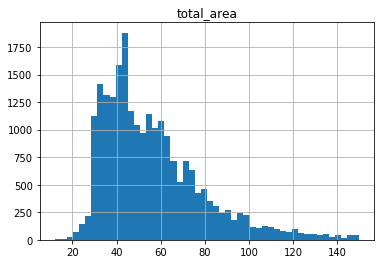

In [34]:
#Изучим площадь квартир. Построим гистограмму 
data.hist('total_area', bins=50, range=(12, 150));

На гистограмме видно, что максимальное количество квартир имеют площадь около 40 метров. Квартиры площадью до 30 метров встречаются редко, при этом резкий подъем начинается именно от 30 метров, и заканчивается пиком в 40 с небольшим метров.

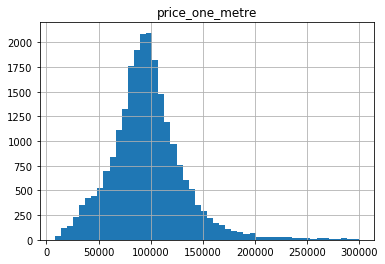

In [35]:
#Изучим цену за кв метр. Построим гистограмму 
data.hist('price_one_metre', bins=50, range=(7963, 300000));

Максимальное количество квартир со стоимостью квадратного метра от 90000 до 100000 руб. Медианное значение было равно 95000.

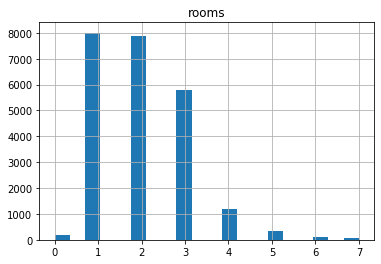

In [36]:
#Изучим количество комнат. Построим гистограмму 
data.hist('rooms', bins=20, range=(0, 7));

Преобладают 1-2-3-х комнатные квартиры 

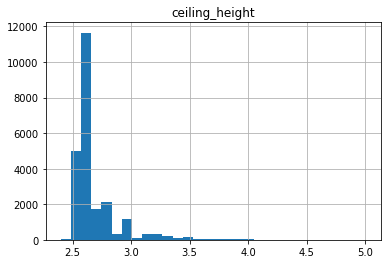

In [37]:
#Изучим высоту потолков. Построим гистограмму 
data.hist('ceiling_height', bins=30, range=(2.4, 5));

Большинство квартир с высотой потолков около 2.6 метра

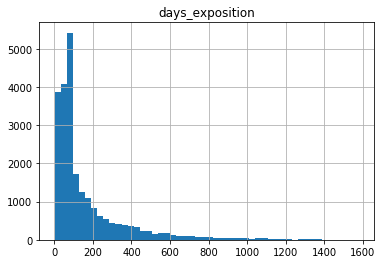

In [38]:
#Изучим время продажи квартиры. Построим гистограмму 
data.hist('days_exposition', bins=50, range=(1, 1580));

In [39]:
#Посчитаем среднее значение время продажи квартиры 
data['days_exposition'].mean()

169.2105330164658

In [40]:
#Посчитаем медианное значение время продажи квартиры 
data['days_exposition'].median()

95.0

Среднее значение составило 169 дней, медианное 95 дней. На гистограмме также видно, что показатель равен медианному значению. Длительность продажи более 95 дней редкость. Также очень много квартир продалось от 1 до 50 дней, я бы назвала их быстрыми сделками. Но есть и продажи, длительность которых превышает 400 дней, такие сделки, на мой взгляд, можно считать долгими. 

Были выявлены выбивающиеся значения в части высоты потолков, а именно значения более 5 метров, что не реально в многоэтажном доме, а также менее 2,4 метра, что также является аномалией. Также была удалена квартира, цена которой была ниже в 35 раз следующего за ней значения.

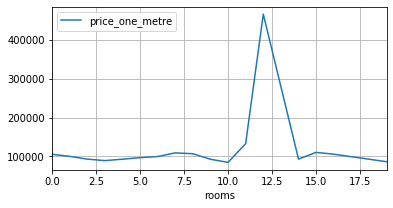

In [41]:
#Построим график зависисмоти цены от количества комнат
data_pivot_rooms = data.pivot_table(index='rooms', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Особой корреляции цены с количеством комнат на графике не замечено, кроме резкого повышения цены на уровне 12 комнат. Это единственная квартира, имеющая 12 комнат и высокую цену за кв метр 

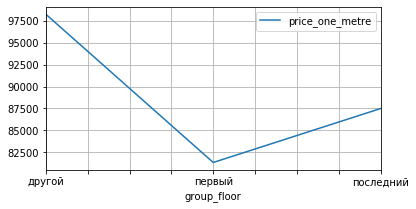

In [42]:
#Построим график зависисмоти цены от этажности 
data_pivot_group_floor = data.pivot_table(index='group_floor', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Цена на первом этаже самая низкая, на последнем тоже ниже, чем на остальных этажах

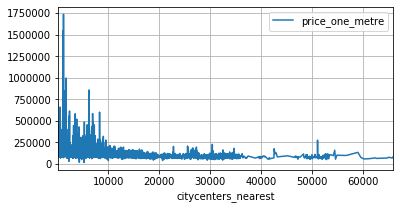

In [43]:
#Построим график зависисмоти цены от удаленности от центра Санкт-Петербурга
data_pivot_cityCenters_nearest = data.pivot_table(index='citycenters_nearest', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Очевидно, что чем ближе к центру Петербурга, тем дороже цена за квадратный метр

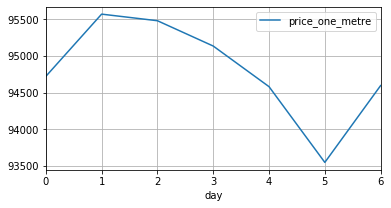

In [44]:
#Построим график зависисмоти цены от дня подачи объявления
data_pivot_day = data.pivot_table(index='day', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Более высокие цены покупатели выставляют в начале недели, к концу недели происходит снижение

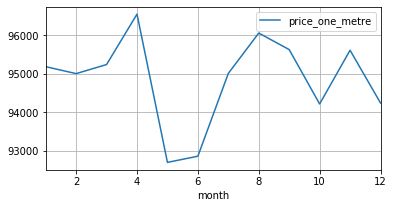

In [45]:
#Построим график зависисмоти цены от месяца подачи объявления
data_pivot_month = data.pivot_table(index='month', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Самые низкие цены зафиксированы в летний период, самые высокие весной и осенью, что очень логично, тк в летний и новогодний период наблюдается затишье на рынке недвижимости

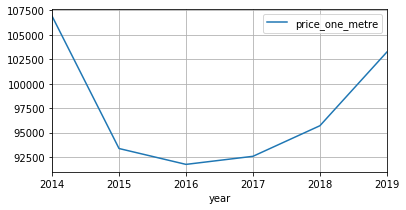

In [46]:
#Построим график зависисмоти цены от года подачи объявления
data_pivot_year = data.pivot_table(index='year', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Из графика следует, что цена имеет резкое снижение на протяжении 2014 года. Продолжает небольшое снижение в 2015, и начинает плавное повышение в 2016, с более резким ростом на протяжени и 2018

In [47]:
#Выделим топ-10 населенных пунктов по количеству объявлений
data_pivot_price_one_metre = data.pivot_table(index='locality_name', values='price_one_metre', aggfunc=['count', 'mean'])

data_pivot_price_one_metre.columns = ['count', 'mean']
data_pivot_price_one_metre.sort_values(by='count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15650,114876.210204
Мурино,552,85629.567754
Шушары,439,78551.343964
Всеволожск,398,68654.475628
Пушкин,369,103125.818157
Колпино,338,75424.581953
Парголово,327,90175.915291
Гатчина,307,68746.147231
Кудрово,299,92473.546488


Самая высокая стоимость жилья среди топ-10 городов по количеству объявлений, ожидаемо, в Санкт-Петербурге, самая низкая в Выборге.

In [48]:
#Создадим столбец с расстоянием до центра в километрах: округлим до целых значений
data['citycenters_nearest_km'] = (data['citycenters_nearest'] / 1000).round(0)

In [49]:
#Выделим квартиры в Санкт-Петербуге
piter = data[data['locality_name'] == 'Санкт-Петербург']

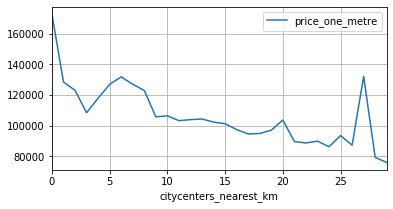

In [50]:
#Построим график зависимости цены по удаленности от центра только по Спнкт-Петербургу
data_pivot_piter = piter.pivot_table(index='citycenters_nearest_km', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

На графике видно, что есть пик на уровне цены 176000 в самом центре Петербурга, затем наблюдается очень резкий спад до 110000, потому что количество дорогих квартир очень мало. Далее цена снова возрастает до 130000 на уровне 7 км, и, затем уже опускается до 105, откуда имеет плавное снижение. На уровне 28 км происходит резкий подъем до 130000, в следствии того, что в одной квартире стоимость кв м составила 194000. В любом случае мы будем считать центром удаленность на уровне до 7 км.

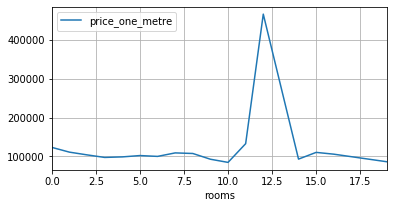

In [51]:
#Построим график зависимости цены от количества комнат только по Петербургу
data_pivot_piter = piter.pivot_table(index='rooms', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Чем меньше комнат, тем выше цена. Виден резкий подъем цены в районе 12 комнат, это единственная квартира с 12 комнатами, которая имеет высокую цену за кв метр

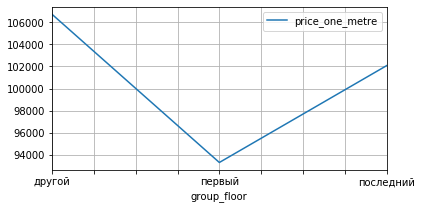

In [52]:
#Построим график зависимости цены от этажности только по Петербургу
data_pivot_piter = piter.pivot_table(index='group_floor', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

На графике видно, что самая низкая цена на первом этаже. На последнем тоже ниже, чем на промежуточных этажах

In [53]:
#Сделаем выборку по центру Санкт-Петербурга
piter_centre = piter[piter['citycenters_nearest_km'] <=7]
piter_centre.sort_values(by='price_one_metre')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_metre,day,month,year,group_floor,ratio_living_total,ratio_kitchen_total,citycenters_nearest_km
17753,12,1800000.0,117.3,2016-02-18,5,2.65,4.0,23.6,2,False,...,483.0,139.0,15345.3,3,2,2016,другой,0.201194,0.109974,5.0
19952,7,2200000.0,138.7,2016-06-24,4,2.65,7.0,90.7,5,False,...,653.0,203.0,15861.6,4,6,2016,другой,0.653929,0.098774,4.0
21338,15,3200000.0,190.0,2016-06-16,1,3.00,6.0,43.0,4,False,...,515.0,11.0,16842.1,3,6,2016,другой,0.226316,0.068421,4.0
23394,10,1600000.0,92.0,2018-07-10,3,3.00,6.0,13.0,1,False,...,167.0,3.0,17391.3,1,7,2018,первый,0.141304,0.108696,4.0
13739,19,2100000.0,80.0,2016-07-01,4,2.65,6.0,23.0,3,False,...,705.0,23.0,26250.0,4,7,2016,другой,0.287500,0.175000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.2,2,False,...,172.0,45.0,995983.9,3,10,2017,другой,0.539759,0.160643,2.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,...,478.0,393.0,1000748.1,5,2,2016,последний,0.508728,0.059850,2.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,188.0,95.0,1542604.8,1,3,2019,последний,0.339733,0.161067,1.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,285.0,233.0,1736842.1,2,4,2018,другой,0.500000,0.210526,1.0


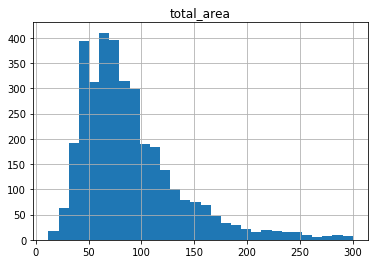

In [54]:
#Изучим данные по площади квартир в центре Петербурга. Построим гистограмму 
piter_centre.hist('total_area', bins=30, range=(12, 300));

В центре Петербурга преобладают квартиры с площадью от 40 до 100 кв метров. Максимальное количество квартир приходится на площадь около 40 и 60-70 кв метров. В целом же по всей выборке площадь квартир составила около 40 метров. Из чего можно сделать вывод, что в центре в основном квартиры большей площади

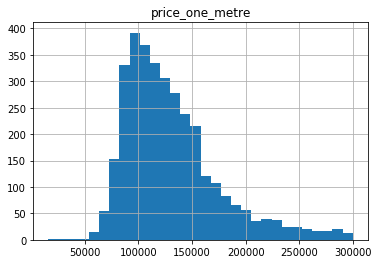

In [55]:
#Изучим данные по цене за метр квартир в центре Петербурга. Построим гистограмму 
piter_centre.hist('price_one_metre', bins=30, range=(16000, 300000));

В центре города преобладает цена за квадратный метр около 100000 рублей, что в принципе соответсвует цене по всей выборке

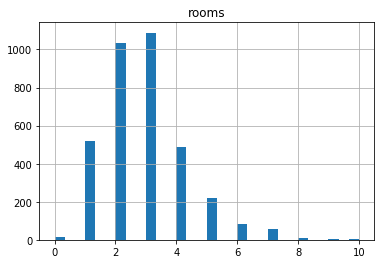

In [56]:
#Изучим данные по количеству комнат в центре Петербурга. Построим гистограмму 
piter_centre.hist('rooms', bins=30, range=(0, 10));

В центре города преобладают 2-3-х комнатные квартиры, в то время как по всей выборке 1-2-3-х комнатные

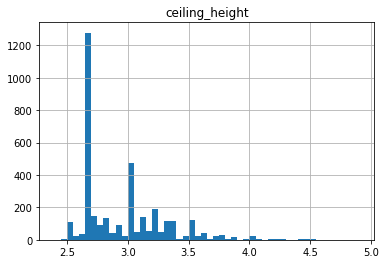

In [57]:
#Изучим данные по высоте потолков в центре Петербурга. Построим гистограмму 
piter_centre.hist('ceiling_height', bins=50, range=(2.4, 4.9)); 

В центре города преобладает высота потолков около 2.7 метров, что незначительно больше, чем по всей выборке

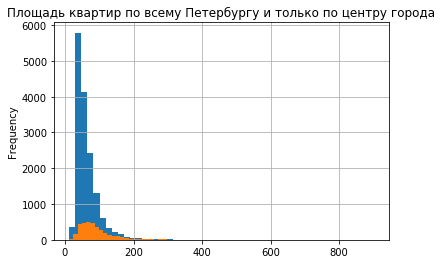

In [58]:
#Изучим данные по общей площади квартир по всему Петербургу и только по центру города . Построим гистограммы 
piter['total_area'].plot(kind='hist', bins=50, grid=True, label='Санкт-Петербург')
piter_centre['total_area'].plot(kind='hist', bins=50, grid=True, label='Центр Санкт-Петербурга', title='Площадь квартир по всему Петербургу и только по центру города');

Из графика сравнения видно, что площадь квартир в центре города больше, чем в целом по городу

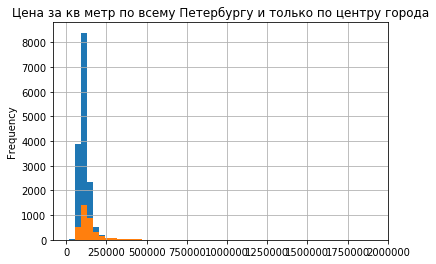

In [59]:
#Изучим данные по цене за кв метр по всему Петербургу и только по центру города. Построим гистограммы 
piter['price_one_metre'].plot(kind='hist', bins=50, grid=True, label='Санкт-Петербург')
piter_centre['price_one_metre'].plot(kind='hist', bins=50, grid=True, label='Центр Санкт-Петербурга', title='Цена за кв метр по всему Петербургу и только по центру города');

Цена за кв м в целом по городу не сильно отличается от цены в центре

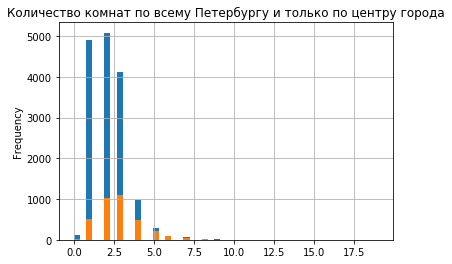

In [60]:
#Изучим данные по количеству комнат по всему Петербургу и только по центру города . Построим гистограммы 
piter['rooms'].plot(kind='hist', bins=50, grid=True, label='Санкт-Петербург')
piter_centre['rooms'].plot(kind='hist', bins=50, grid=True, label='Центр Санкт-Петербурга', title='Количество комнат по всему Петербургу и только по центру города');

Количество комнат в центре города больше, чем в целом по городу

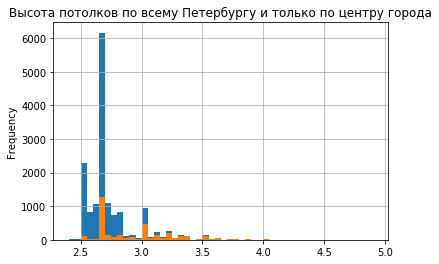

In [61]:
#Изучим данные по высоте потолков по всему Петербургу и только по центру города . Построим гистограммы 
piter['ceiling_height'].plot(kind='hist', bins=50, grid=True, label='Санкт-Петербург')
piter_centre['ceiling_height'].plot(kind='hist', bins=50, grid=True, label='Центр Санкт-Петербурга', title='Высота потолков по всему Петербургу и только по центру города');

Высота потолков в центре города выше, чем в целом по городу


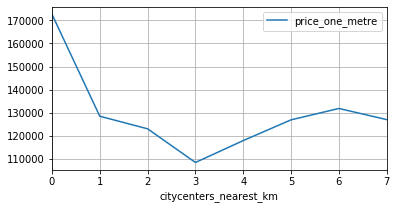

In [62]:
#Построим график зависимоти цены за кв метр по удаленности от центра по центру Петербурга
data_pivot_piter_centre = piter_centre.pivot_table(index='citycenters_nearest_km', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Цена зв кв метр в центре города снижается в зависимости от удаленности от центра

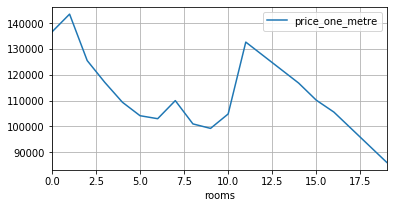

In [63]:
#Построим график зависимоти цены за кв метр от количества комнат по центру Петербурга
data_pivot_piter_centre = piter_centre.pivot_table(index='rooms', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

Самая высокая цена за квадратный метр у квартир с меньшим количеством комнат. В районе 12 комнат снова пик на той квартире, которая ранее также выбивалась на других графиках

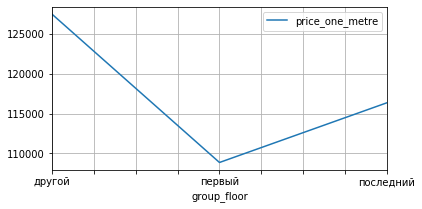

In [64]:
#Построим график зависимоти цены за кв метр от этажности по центру Петербурга
data_pivot_piter_centre = piter_centre.pivot_table(index='group_floor', values='price_one_metre', aggfunc='median').plot(grid=True, figsize=(6, 3))

В центре города стандартная картина с зависимостью от этажности: первый самый дешевый, последний также дешевле, промежуточные самые дорогие

In [73]:
#Посмотрим зависимость при помощи корреляции Пирсона по всему датасету
data[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()

,last_price,total_area,rooms,citycenters_nearest
last_price,1.000000,0.653687,0.363192,-0.194720
total_area,0.653687,1.000000,0.758769,-0.224979
rooms,0.363192,0.758769,1.000000,-0.186425
citycenters_nearest,-0.194720,-0.224979,-0.186425,1.000000


Стоимость квартиры имеет заметную корреляцию с площадью квартиры. Умеренную с количеством комнат. И не имеет корреляции с удаленностью от центра.

In [66]:
#Посмотрим корреляцию по центру Петербурга
piter_centre[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()

,last_price,total_area,rooms,citycenters_nearest
last_price,1.000000,0.615215,0.316746,-0.042023
total_area,0.615215,1.000000,0.731874,-0.092017
rooms,0.316746,0.731874,1.000000,-0.169859
citycenters_nearest,-0.042023,-0.092017,-0.169859,1.000000


По выборке центра Петербурга подобная картина.

                     citycenters_nearest     rooms  total_area
citycenters_nearest             1.000000 -0.366924   -0.377656
rooms                          -0.366924  1.000000    0.784996
total_area                     -0.377656  0.784996    1.000000


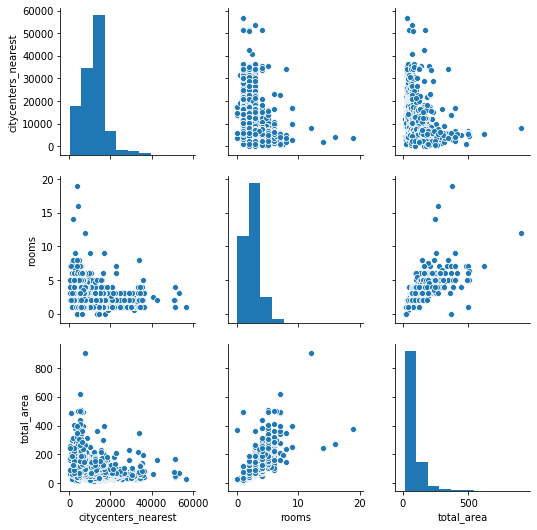

In [72]:
#Построим матрицу рассеяния
data_corr = data.pivot_table(index='last_price', values=['total_area', 'rooms', 'citycenters_nearest'])
print(data_corr.corr())
sbn.pairplot(data_corr);

#pd.plotting.scatter_matrix(data_corr, figsize=(9,9));

## Общий вывод

В общем и целом картина по центру города не сильно отличается от картины всего города и общей выборки. В центре квартиры имеют большую площадь, больше комнат и немного выше потолки, но это не оказывает сильного влияния на цену. Средняя цена почти одинаковая и в центре и по Петербургу в целом. В самом центре города есть несколько квартир, цена которых гораздо выше остальных, но их количество настолько мало, что не влияет на общую картину. 

Стоимость квартиры имеет наибольшую зависимость от площади. Также видна умеренная зависимость от количества комнат, что собственно взаимосвязано с общей площадью. А вот удаленность от центра не имеет влияния на цену. Подобная картина складывется и в выборке по центру города.